In [ ]:
#DIR3122: Computational Fluid Dynamics - Bridget McGibbon
#Step 6: Non-Linear Convection in 2D

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#define variables
sigma = 0.2

nx = 101
dx = 2/(nx-1)

ny = nx
dy = 2/(ny-1)

nt = 80
dt = sigma*dx


#create arrays for space dimension
xdim = np.linspace(0,2,nx)
ydim = np.linspace(0,2,ny)

#create arrays for u (x-component of dependant variable) and v (y-component of dependant variable)
u = np.ones((nx,ny))
v = np.ones((nx,ny))

#set I.C.: 
#u=2 when 0.5<=x<=1 AND 0.5<=y<=1, u=1 everywhere else
#v=2 when 0.5<=x<=1 AND 0.5<=y<=1, v=1 everywhere else
u[int(0.5/dx):int(1/dx)+1, int(0.5/dy):int(1/dy)+1] = 2
v[int(0.5/dx):int(1/dx)+1, int(0.5/dy):int(1/dy)+2] = 2

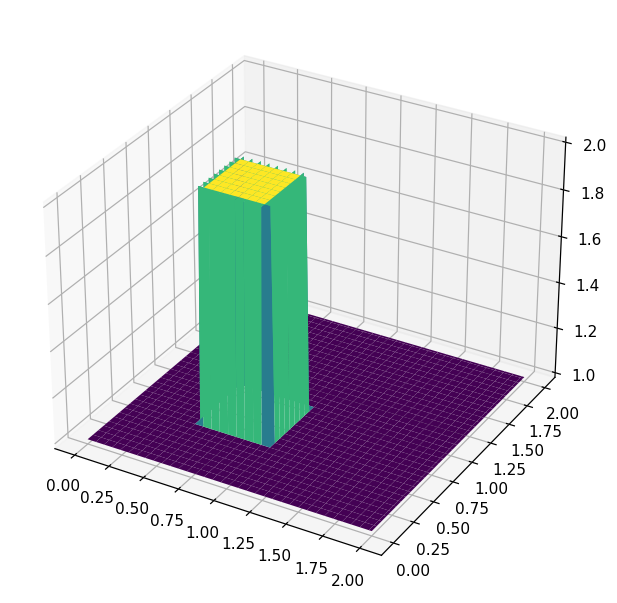

In [3]:
fig = pyplot.figure(figsize = (11,7), dpi=110) #create a figure, figsize and dpi denote the size and resolution, respectively
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xdim, ydim)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [6]:
for n in range(1, nt):
    un=u.copy()
    vn=v.copy()
    u[1:, 1:] = un[1:,1:] - un[1:,1:]*(dt/dx)*(un[1:,1:]-un[:-1,1:]) - un[1:,1:]*(dt/dy)*(un[1:,1:]-un[1:,:-1])
    v[1:, 1:] = vn[1:,1:] - vn[1:,1:]*(dt/dx)*(vn[1:,1:]-vn[:-1,1:]) - vn[1:,1:]*(dt/dy)*(vn[1:,1:]-vn[1:,:-1])

    
    #boundary conditions: u,v = 1 at boundaries
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1, :] = 1
    v[:,0] = 1
    v[:,-1] = 1

1.000018368416117


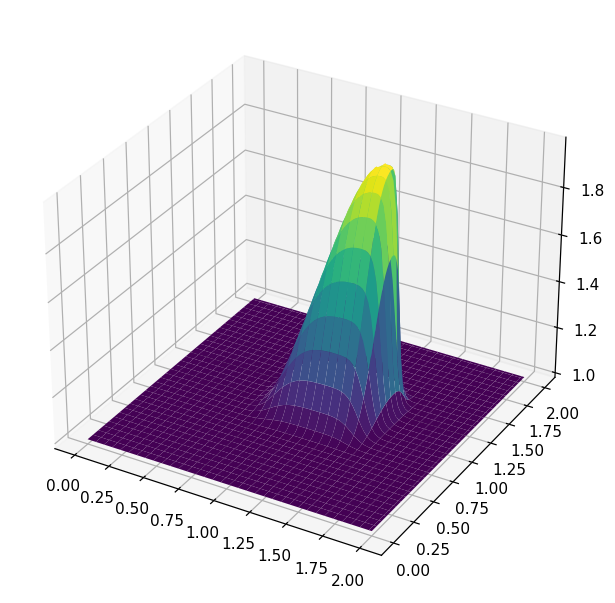

In [12]:
fig = pyplot.figure(figsize = (11,7), dpi=110) #create a figure, figsize and dpi denote the size and resolution, respectively
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xdim, ydim)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)